In [1]:
from PIL import Image
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from generators.genutils import *
from generators.randomwalk_animation import randomwalk

Another random walk, but this time I'm letting the "bug" cross its own path. 
So I walk until the colors run out (by default), but don't fill the whole canvas.

I'm not saving the animated gifs to github.

## 15-bit colors

Pick a random color to start with, re-sort the remaining colors by distance from that color, and walk.

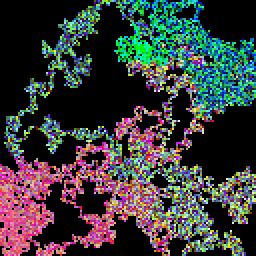

In [2]:
# initialize the colorlist, which is a list of ColorClass objects
colorlist = []
for r in range(0, 32):
    for g in range(0, 32):
        for b in range(0, 32):
            color = (r * 8, g * 8, b * 8)
            colorlist.append(ColorClass(color))

side = 128  # walk a 128x128 grid
scale = 2 # produce a 256 by 256 image (resize is a cheap way to scale up...)

rng = np.random.default_rng(20240526)
walk1 = randomwalk(colorlist, "animated_gifs/randomwalk_15bit.gif", 
                   size=side, scale=2, rng=rng)
display(walk1)


## Use colors from an image

First with a random color to start.

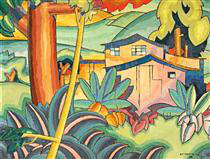

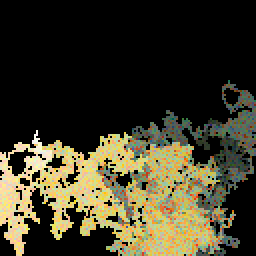

In [3]:
kahala_img = "sourceimages/old-kahala-home-1928_210x159.jpg"
chiefs_img = "sourceimages/greeting-by-chiefs-1928_210x148.jpg"

oimage = Image.open(kahala_img)
display(oimage)

colors = list(oimage.getdata())
colorlist = [ColorClass(c) for c in colors]
walk2 = randomwalk(colorlist, "animated_gifs/randomwalk_kahala.gif", 
                   size=side, scale=2, rng=rng)
display(walk2)

Then just walk the colors as given in the image.

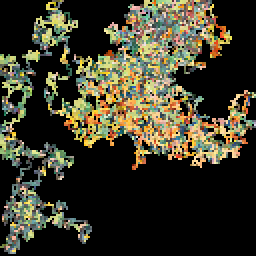

In [4]:
colors = list(oimage.getdata())
colorlist = [ColorClass(c) for c in colors]
walk3 = randomwalk(colorlist, "animated_gifs/randomwalk_kahala_noshuffle.gif", 
                   shuffle_colors=False,
                   size=side, scale=2, rng=rng)
display(walk3)

Another image, with random color start.

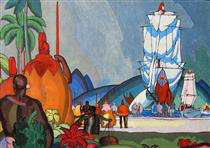

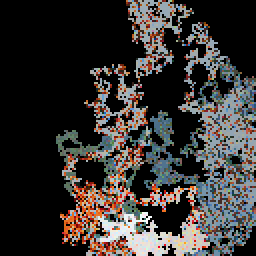

In [5]:
oimage = Image.open(chiefs_img)
display(oimage)

colors = list(oimage.getdata())
colorlist = [ColorClass(c) for c in colors]
walk4 = randomwalk(colorlist, "animated_gifs/randomwalk_chiefs.gif", 
                   size=side, scale=2, rng=rng)
display(walk4)

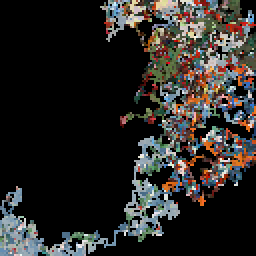

In [6]:
# no shuffle
colors = list(oimage.getdata())
colorlist = [ColorClass(c) for c in colors]
walk5 = randomwalk(colorlist, "animated_gifs/randomwalk_chiefs_noshuffle.gif", 
                   shuffle_colors=False, size=side, scale=2, rng=rng)
display(walk5)

## Viridis palette, no shuffle

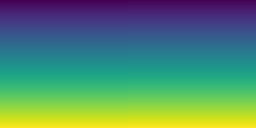

In [7]:
cmap = plt.get_cmap('viridis')
num_colors = 256*128  # this will be quantized, but that's ok
vrgb = [mcolors.to_rgb(cmap(i)) for i in np.linspace(0, 1, num_colors)]

# scale up by 255
colors = [(int(r*255), int(g*255), int(b*255)) for r, g, b in vrgb]
img = Image.new("RGB", (256, 128))
img.putdata(colors)
display(img)


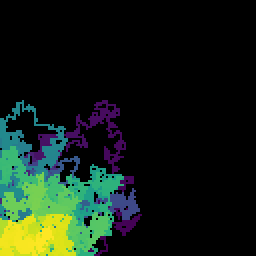

In [8]:
colorlist = [ColorClass(c) for c in colors]
walk6 = randomwalk(colorlist, "animated_gifs/randomwalk_viridis.gif", 
                   shuffle_colors=False, 
                   size=side, scale=2, rng=rng)
display(walk6)

vimeo link for viridis movie (different run) - https://vimeo.com/950623487/35a22641ac?share=copy